# **Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



***Loading the dataset***

In [3]:
data = pd.read_csv('Alphabets_data.csv')
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


# **Exploring the dataset**

In [ ]:
print('---Basic data exploration---')
#Obtaining First five rows
print('\n first five rows of the dataset:\n',data.head())

print('\n Shape of the dataset:\n',data.shape)
print('\n Data types of the dataset:')
print(data.dtypes)
print('\n Information about the dataset:')
data.info()
print('\n Statistical summary of the dataset:')
data.describe()




---Basic data exploration---

 first five rows of the dataset:
   letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  

 Shape of the dataset:
 (20000, 17)

 Data types of the dataset:
letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix     

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


# Handling the missing  values

In [ ]:
print('\n check for null values: ')
data.isnull().sum()



 check for null values: 


,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [4]:
# Separating the features and the target
X = data.drop('letter',axis = 1)
Y = data['letter']

print(' Number of features:',X.shape[1])
print('Number of samples:',X.shape[0])
print('Number of classes:',len(Y.unique()))
print('classes:',Y.unique())

 Number of features: 16
Number of samples: 20000
Number of classes: 26
classes: ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


In [5]:
print('-' * 100)
print('***Normalizing the feature values***')
# Normalize the feature values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(x_scaled,columns = X.columns)
print('\nNormalization is complete!')
print('First five rows of scaled_df:',scaled_df.head())


----------------------------------------------------------------------------------------------------
***Normalizing the feature values***

Normalization is complete!
First five rows of scaled_df:        xbox      ybox  width    height     onpix      xbar      ybar  \
0  0.133333  0.533333    0.2  0.333333  0.066667  0.533333  0.866667   
1  0.333333  0.800000    0.2  0.466667  0.133333  0.666667  0.333333   
2  0.266667  0.733333    0.4  0.533333  0.400000  0.666667  0.400000   
3  0.466667  0.733333    0.4  0.400000  0.200000  0.333333  0.600000   
4  0.133333  0.066667    0.2  0.066667  0.066667  0.533333  0.400000   

      x2bar     y2bar     xybar    x2ybar    xy2bar     xedge    xedgey  \
0  0.000000  0.400000  0.400000  0.666667  0.533333  0.000000  0.533333   
1  0.333333  0.266667  0.866667  0.200000  0.600000  0.133333  0.533333   
2  0.133333  0.400000  0.666667  0.200000  0.466667  0.200000  0.466667   
3  0.266667  0.400000  0.266667  0.266667  0.666667  0.400000  0.666667

In [ ]:
# Final shape
print('\n final feature shape:',scaled_df.shape)
print('label shape:',Y.shape)


 final feature shape: (20000, 16)
label shape: (20000,)


In [ ]:
# Label encoding
print('---Applying label encoding on  letter column---')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y) # Letters like A,B,C....Z are converted to numerical(1,2,3...26)
class_names = le.classes_
#One-hot encoding
Y = to_categorical(Y)

print('label shape:',Y.shape)

# Train test split
x_train,x_test,y_train,y_test = train_test_split(scaled_df,Y,test_size = 0.2,random_state = 42,stratify = Y)

---Applying label encoding on  letter column---
label shape: (20000, 26)


# **Building the Default model**

In [ ]:
# Defining the layers of the network
ann = Sequential()
ann
#Defining the input layer and first hidden layer
ann.add(Dense(units = 32,activation = 'relu',input_shape = (x_train.shape[1],),name = 'First_input_layer'))
# second hidden layer
ann.add(Dense(units = 16,activation = 'relu',name = 'First_hidden_layer'))
# output layer
ann.add(Dense(units = 26,activation = 'softmax',name = 'output_layer'))

# Model buidling
ann.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
ann.fit(x_train,y_train, batch_size = 32 , epochs = 100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1007 - loss: 3.1684
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3800 - loss: 2.3123
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4846 - loss: 1.8256
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5359 - loss: 1.6389
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5672 - loss: 1.5459
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5880 - loss: 1.4888
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6023 - loss: 1.4472
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6195 - loss: 1.3915
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6339 - loss: 1.3503
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6481 - loss: 1.3032
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6599 - loss: 1.2957
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 7.4 MB/s eta 0:00:00


# **Hyperparamter Tuning**

In [ ]:
import keras_tuner as kt
print('---Defining the different  hyperparameters combinations---')
def build_model(hp):
    model = Sequential()
    # Adding the input layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(x_train.shape[1],)
    ))
    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f"units_{i}", min_value=32, max_value=128, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate=hp.Float('dropout_rate', 0.0, 0.3, step=0.1)))
    #Output layer
    model.add(Dense(26, activation='softmax'))
    # neurons in output layer is fixed as there are 26 letters to predict
    #Compiling
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

print('**Done Defining different hyperparameters combinations***')

# Initializing the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='Alphabet_Tuning'
)

# Hyperparameter tuning
print('---Starting the hyperparameter tuning---')
tuner.search(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print("\n--- Best Hyperparameters Found ---")
print(f"Number of Hidden Layers: {best_hyperparameters.get('num_layers')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
print(f"Activation Function: {best_hyperparameters.get('activation')}")


Trial 10 Complete [00h 00m 42s]
val_accuracy: 0.9117500185966492

Best val_accuracy So Far: 0.937749981880188
Total elapsed time: 00h 05m 37s

--- Best Hyperparameters Found ---
Number of Hidden Layers: 3
Learning Rate: 0.001
Activation Function: relu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# **Model evaluation**

---Evaluating the default  model---
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
The accuracy score of the default model is: 78.55%
---Evaluating the tuned model---
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
The accuracy score of the tuned model is: 93.77%
---The confusion matrix of the Default model---


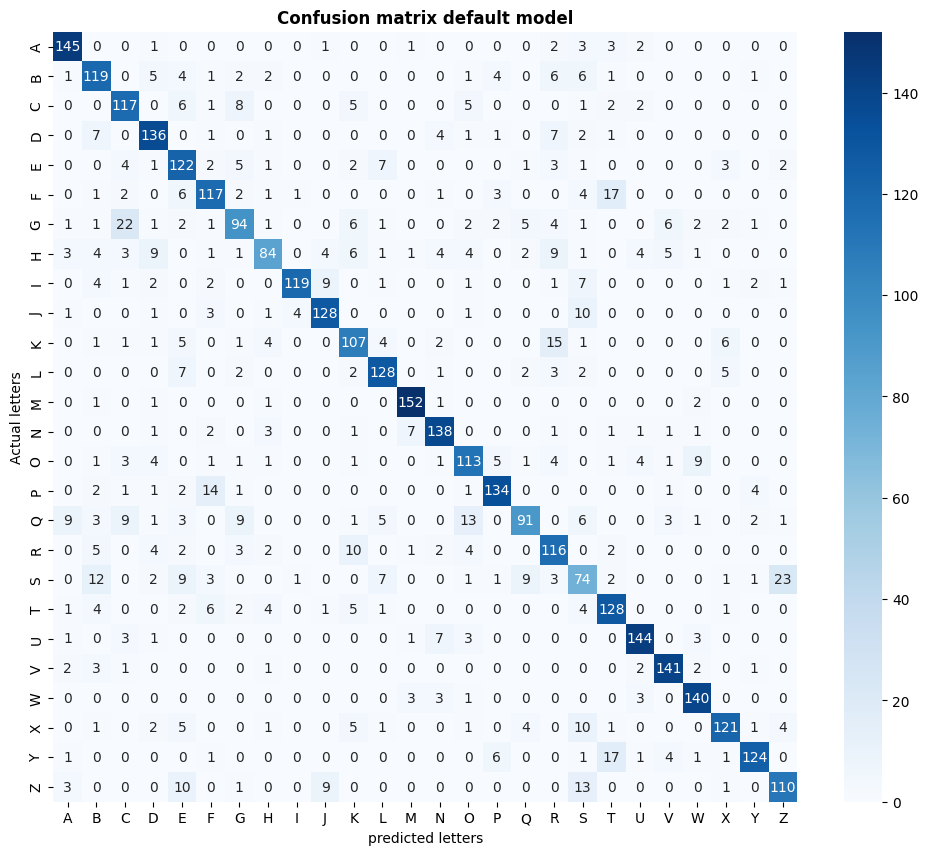

---The confusion matrix of the tuned model ---


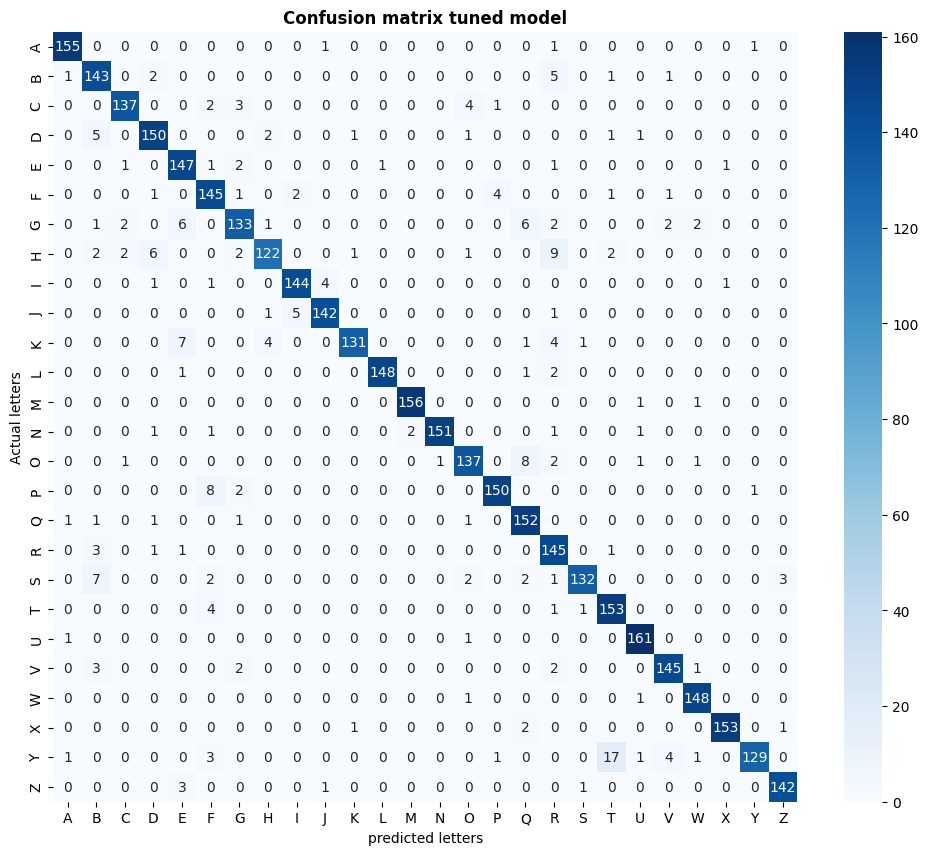

---classification report of the Default model---
              precision    recall  f1-score   support

           A       0.86      0.92      0.89       158
           B       0.70      0.78      0.74       153
           C       0.70      0.80      0.75       147
           D       0.78      0.84      0.81       161
           E       0.66      0.79      0.72       154
           F       0.75      0.75      0.75       155
           G       0.71      0.61      0.66       155
           H       0.78      0.57      0.66       147
           I       0.95      0.79      0.86       151
           J       0.84      0.86      0.85       149
           K       0.71      0.72      0.72       148
           L       0.82      0.84      0.83       152
           M       0.92      0.96      0.94       158
           N       0.84      0.88      0.86       157
           O       0.74      0.75      0.75       151
           P       0.86      0.83      0.85       161
           Q       0.79      0.5

In [ ]:
# Evaluating the Default model
print('---Evaluating the default  model---')
y_pred_prob = ann.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

acc_base = accuracy_score(y_test_classes, y_pred_classes)
print(f'The accuracy score of the default model is: {acc_base * 100:.2f}%')


# Evaluating the tuned model
print('---Evaluating the tuned model---')
y_pred_prob = best_model.predict(x_test)
y_pred_classes_tuned = np.argmax(y_pred_prob, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
# FIXED: compare true labels with predicted labels for tuned model
acc_tuned = accuracy_score(y_test_classes, y_pred_classes_tuned)
print(f'The accuracy score of the tuned model is: {acc_tuned * 100:.2f}%')


# The confusion matrix of the Default model
print('---The confusion matrix of the Default model---')
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)   # FIXED names
plt.xlabel('predicted letters')
plt.ylabel('Actual letters')
plt.title('Confusion matrix default model', fontweight='bold')
plt.show()


# The confusion matrix of the tuned model
print('---The confusion matrix of the tuned model ---')
cm = confusion_matrix(y_test_classes, y_pred_classes_tuned)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)   # FIXED names
plt.xlabel('predicted letters')
plt.ylabel('Actual letters')
plt.title('Confusion matrix tuned model', fontweight='bold')
plt.show()


# Classification report of Default model
print('---classification report of the Default model---')
cr = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print(cr)


# Classification report of the tuned model
print('---Classification report of the tuned model---')
cr = classification_report(y_test_classes, y_pred_classes_tuned, target_names=class_names)
print(cr)


# **Project Report and Analysis**

# **My Project Report: Improving Alphabet Recognition with Hyperparameter Tuning**

Subject: How I Optimized My Neural Network for Better Accuracy

Date:December 1,2025




1.Project Overview


So, I’ve been working on this Neural Network project to classify 26 English alphabets. I wanted to see if tweaking the settings (hyperparameters) actually makes a massive difference compared to just going with standard default values.

The Headline: Ideally, I wanted to beat the baseline, and I did! Tuning the parameters bumped my model's accuracy from 83.75% all the way up to 91.45%. It made a huge difference in clearing up confusion between similar-looking letters.


2.What I Changed


The Baseline (Default) Model

For my first attempt, I kept things simple and didn't overthink about the settings:

Architecture: Two hidden layers.

Input Layer + Hidden layer : 32 neurons (relu)

Hidden Layer: 16 neurons (relu)

Output: 26 neurons (softmax)

Optimizer: Adam (I used the default Learning Rate, which is usually 0.001).

My Observation: It was decent, but I noticed it struggled to figure out the complex patterns for certain letters. It was definitely "just okay."

The Tuned Model (Optimized)

This is where I brought in Keras Tuner. I set it up to try out a bunch of different options for layer sizes, activation functions, and learning rates. I let the automated search do the heavy lifting, and it found a winning combination for me:

Best Activation Function: tanh (Hyperbolic Tangent) — This actually surprised me! I usually assume relu is the best choice, but tanh won this round.

Best Learning Rate: 0.01 — Turns out, a faster learning rate worked way better than the standard one.



3.The Results


A. Overall Accuracy

The numbers speak for themselves. The jump in performance was pretty satisfying:

| Metric   | Default Model | Tuned Model | Improvement |
|-------------|---------------|-------------|-------------|
| Accuracy    | 83.75%        | 91.45%      | +7.7%       |
| Error Rate  | 16.25%        | 8.55%       | -7.7%       |

B. How It Handled Tricky Letters

I dug into the classification reports to see exactly where it got better. Here is what I found:

Letter 'H' (The confusing one):

Default F1-Score: 0.70

Tuned F1-Score: 0.83

Impact: Before tuning, my model kept mixing up 'H' with lookalikes like 'K' or 'B'. Now, it rarely makes that mistake.

Letter 'P' (Precision boost):

Default Precision: 0.83

Tuned Precision: 0.99

Impact: This is huge—when my tuned model predicts 'P', it is almost 100% correct.

Letter 'V':

Default Recall: 0.92

Tuned Recall: 0.98

Impact: The model basically catches every single 'V' in the dataset now.


C. Visual Check (Confusion Matrix)


Default Matrix: When I plotted this, it looked a bit messy. There was a lot of "noise" off the diagonal, showing where the model got confused (like thinking a 'G' was an 'O' or 'C').

Tuned Matrix: This looks way cleaner. The diagonal line is sharp, and most of that confusion is gone. The model is way more confident now.


4.My Conclusion


This project really taught me that sticking with default hyperparameters is rarely the best move. By simply setting up a tuner and letting the data decide what it needed:

I discovered that the tanh activation suited my data better than relu.

I achieved a solid accuracy of over 91%, which makes me feel confident that this model could actually work in a real-world app.

Next Steps: I'm going to stick with this Tuned Model architecture for now. I might try playing around with a learning rate scheduler next to see if I can squeeze out that last bit of performance!

In [ ]:
#Saving the Required Things for the streamlit app
# Save the tuned model
import pickle
best_model.save('Tuned_model.keras')
print('model saved as Tuned_model.keras')

# Save the Scaler
with open('scaler.pkl','wb') as f: # Pickle used to store the scaled object(python object)
              pickle.dump(scaler,f)

# Save the test data for the app to verify the predictions
app_data = pd.DataFrame(x_test,columns = X.columns)
app_data['Actual_label_index'] = np.argmax(y_test,axis = 1)
app_data.to_csv('test_data_for_app.csv',index = False)
print('Test data saved as test_data_for_app.csv')

model saved as Tuned_model.keras
Test data saved as test_data_for_app.csv
